In [106]:
import numpy as np
import pandas as pd
from bs4 import BeautifulSoup
from urllib.request import urlopen
from datetime import datetime as dt
import re
import time
import datetime as dt
from time import sleep
from IPython.display import clear_output
import os
from selenium import webdriver
from webdriver_manager.microsoft import EdgeChromiumDriverManager
from selenium.webdriver.common.by import By
from selenium.webdriver.support.select import Select
from selenium.webdriver import Keys, ActionChains
from selenium.webdriver.common.actions.action_builder import ActionBuilder

In [170]:
browser = webdriver.Edge(EdgeChromiumDriverManager().install())
url = 'https://www.metrocuadrado.com/?search=form'
browser.get(url)
sleep(2)

C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_18908\3163306383.py:1: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  browser = webdriver.Edge(EdgeChromiumDriverManager().install())


In [171]:
filtro_tipo_inmueble = browser.find_elements(By.CLASS_NAME, "m2-select__control")[0]
actions_tipo_inmueble = ActionChains(browser)
actions_tipo_inmueble.send_keys_to_element(filtro_tipo_inmueble, Keys.ARROW_RIGHT)
actions_tipo_inmueble.send_keys(Keys.ARROW_DOWN)
actions_tipo_inmueble.send_keys(Keys.SPACE)
actions_tipo_inmueble.send_keys(Keys.ARROW_DOWN)
actions_tipo_inmueble.send_keys(Keys.SPACE)
actions_tipo_inmueble.perform()
sleep(2)

filtro_estado = browser.find_elements(By.CLASS_NAME, "m2-select__control")[1]
actions_filtro_estado = ActionChains(browser)
actions_filtro_estado.send_keys_to_element(filtro_estado, Keys.ARROW_RIGHT)
actions_filtro_estado.send_keys(Keys.ARROW_DOWN)
actions_filtro_estado.send_keys(Keys.ARROW_DOWN)
actions_filtro_estado.send_keys(Keys.TAB)
actions_filtro_estado.perform()
sleep(2)

selecting_city = browser.find_element(By.NAME, "location")
selecting_city.send_keys("Bogo")
sleep(1)

actions_selecting_city = ActionChains(browser)
actions_selecting_city.send_keys_to_element(selecting_city, Keys.ARROW_RIGHT)
actions_selecting_city.send_keys(Keys.ARROW_DOWN)
actions_selecting_city.send_keys(Keys.ARROW_DOWN)
actions_selecting_city.send_keys(Keys.ENTER)
actions_selecting_city.perform()
sleep(6)

ordenar = browser.find_elements(By.CLASS_NAME, "m2-select__control")[2]
actions = ActionChains(browser)
actions.send_keys_to_element(ordenar, Keys.ARROW_RIGHT)
actions.send_keys(Keys.ARROW_DOWN)
actions.send_keys(Keys.ARROW_DOWN)
actions.send_keys(Keys.ENTER)
actions.perform()

In [125]:
paso_1 = browser.find_element(By.XPATH, "/html/body/div[2]/div/div/div[2]/div[2]/div[1]/div[2]/ul/li/form/div/div/div/div[2]/div")
actions = ActionChains(browser)
actions.send_keys_to_element(paso_1, Keys.ARROW_DOWN)
actions.send_keys(Keys.ARROW_DOWN)
actions.send_keys(Keys.ENTER)
actions.perform()

'<html><head><script type="text/javascript" async="" src="https://www.google-analytics.com/plugins/ua/ec.js"></script> <script async="" src="https://tags.bkrtx.com/js/bk-coretag.js"></script><script async="" src="https://sb.scorecardresearch.com/beacon.js"></script><script async="" src="https://www.googletagmanager.com/gtm.js?id=GTM-T4S3ZHX"></script><script src="https://s.yimg.com/wi/ytc.js" async=""></script><script src="https://connect.facebook.net/signals/config/591972094936802?v=2.9.81&amp;r=stable" async=""></script><script async="" src="https://connect.facebook.net/en_US/fbevents.js"></script><script type="text/javascript" async="" src="https://static.hotjar.com/c/hotjar-966913.js?sv=7"></script><script type="text/javascript" async="" src="https://www.googleadservices.com/pagead/conversion_async.js"></script><script type="text/javascript" async="" src="https://www.google-analytics.com/analytics.js"></script><script async="" src="https://www.googletagmanager.com/gtm.js?id=GTM-WTM
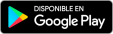
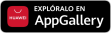
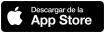

In [103]:
html = browser.page_source
html


In [120]:
date_name = dt.datetime.now().strftime('%Y_%m_%d_%H_%M_%S')
name_file = f'inmuebles_{date_name}.txt'
with open(f'/data_raw/{name_file}', 'w') as file:
    f.write('html')

FileNotFoundError: [Errno 2] No such file or directory: '/data_raw/inmuebles_2022_09_15_17_03_32.txt'

In [2]:
def txt_to_links(text_file):
    with open(text_file, 'r', encoding="utf-8") as f:
        lista_aptos_raw = f.read()
    soup = BeautifulSoup(lista_aptos_raw, 'html.parser')
    data_raw = soup.find(attrs={"class": "Ul-sctud2-0 jyGHXP realestate-results-list browse-results-list"})
    data_raw = data_raw.find_all(attrs={"class": "sc-bdVaJa ebNrSm"})
    list_links = list()
    for data in data_raw:
        try:
            list_links.append('https://www.metrocuadrado.com'+data['href'])
        except: None
    out = list(set(list_links))

    print(f'{text_file}. Enlaces importados: {len(out)}')
    return out

def enlace_to_rowdf(enlace):
    new_row = dict()
    new_row['Código inmueble'] = 'UNASIG 000'
    new_row['Enlace'] = enlace
    obs_text = ''
    try:
        page = urlopen(enlace)
        html_bytes = page.read()
        html = html_bytes.decode("utf-8")
        soup = BeautifulSoup(html, 'html.parser')

        try:
            data_raw_1 = soup.find('title')
            new_row['Tipo'] = data_raw_1.text.split(' ')[2]
        except:
            obs_text = obs_text + 'sin info_2'

        try:
            data_raw_2 = soup.find('p', attrs={"class": "P-sc-31hrrf-0 hGwghD card-subtitle"})
            new_row['Sector'] = ', '.join(data_raw_2.text.split(',')[0].upper().replace('SECTOR ', '').replace(' Y ALREDEDORES', '').split(' Y '))
        except:
            obs_text = obs_text + 'sin info_2'

        try:
            data_raw_3 = soup.find('ul', attrs={"class": "Ul-sctud2-0 kdIYsW inline-list-grid list-feature-detail"})
            data_raw_3 = data_raw_3.find_all('li')
            new_row['Habitaciones'] = int(data_raw_3[1].text[0])
            new_row['Baños'] = int(data_raw_3[2].text[0])
            new_row['Estrato'] = int(data_raw_3[3].text[0])
        except:
            new_row['Habitaciones'] = np.NaN
            new_row['Baños'] = np.NaN
            new_row['Estrato'] = np.NaN
            obs_text = obs_text + ', '+ 'sin info_3'

        try:
            data_raw_4 = soup.find_all(attrs={"class": "Col-sc-14ninbu-0 lfGZKA mb-3 pb-1 col-12 col-lg-3"})
            for element in data_raw_4:
                if element.h3.text == 'Precio' or element.h3.text == 'Valor administración':
                    text = int(element.p.text[1:].replace('.', ''))
                elif element.h3.text == 'Área construida' or element.h3.text == 'Área privada':
                    text = float(element.p.text[:-2].replace(' ', ''))
                elif element.h3.text == 'Parqueaderos':
                    text = int(element.p.text)
                elif element.h3.text == 'Barrio común':
                    text = element.p.text.upper()
                else:
                    text = element.p.text
                new_row[element.h3.text] = text
        except:
            obs_text = obs_text + ', '+  'sin info_4'
            new_row['Observaciones'] = obs_text




        try:
            card_block = soup.find_all('div', attrs={"class": "card-block"})
            try:
                lista_interiores_raw = card_block[3].find_all('ul', attrs={"class": "Ul-sctud2-0 kdIYsW inline-list-grid"})
                lista_interiores = list()
                for item in lista_interiores_raw:
                    lista_interiores.append(item.text)
                new_row['Interiores'] = ', '.join(lista_interiores)
            except:
                obs_text = obs_text + ', '+  'sin info_5.1'
                new_row['Observaciones'] = obs_text

            try:
                lista_exteriores_raw = card_block[4].find_all('ul', attrs={"class": "Ul-sctud2-0 kdIYsW inline-list-grid"})
                lista_exteriores = list()
                for item in lista_exteriores_raw:
                    lista_exteriores.append(item.text)
                new_row['Exteriores'] = ', '.join(lista_exteriores)
            except:
                obs_text = obs_text + ', '+  'sin info_5.2'
                new_row['Observaciones'] = obs_text
            try:
                lista_zonascomunes_raw = card_block[5].find_all('ul', attrs={"class": "Ul-sctud2-0 kdIYsW inline-list-grid"})
                lista_zonascomunes = list()
                for item in lista_zonascomunes_raw:
                    lista_zonascomunes.append(item.text)
                new_row['Zonas comunes'] = ', '.join(lista_zonascomunes)
            except:
                obs_text = obs_text + ', '+  'sin info_5.3'
                new_row['Observaciones'] = obs_text
        except:
            obs_text = obs_text + ', '+  'sin info_5'
            new_row['Observaciones'] = obs_text
    except:
        obs_text = 'Sin acceso a enlace'
    new_row['Observaciones'] = obs_text
    return new_row

def reposo(time2sleep, n):
    clear_output(wait=True)
    print(f'>> REPOSO DE {time2sleep} SEGUNDOS, APARTAMENTOS BUSCADOS: {n}')
    print('------------------------------------------')
    time.sleep(30)
    return None

columnas = ['Código inmueble', 'Tipo', 'Habitaciones', 'Baños', 'Estrato', 'Precio', 'Antigüedad',
            'Área construida', 'Área privada', 'Valor administración', 'Parqueaderos', 'Sector',
            'Barrio común', 'Interiores', 'Exteriores', 'Zonas comunes', 'Valor arriendo',
            'Enlace', 'Observaciones']

def enlaces_to_df(lista_enlaces, columnas=columnas, verbose=False, new=False, no_reposo=50, seg_reposo=30):
    """
    dataframe
    lista enlaces
    bath_size
    """
    lista_dict_aptos = list()
    if not new: df_aptos = pd.read_excel('main_aptos.xlsx')
    else: df_aptos = pd.DataFrame(columns=columnas)
    n = 0
    for enlace in lista_enlaces:
        cod = enlace.split('/')[-1]
        if cod not in list(df_aptos['Código inmueble']):
            print(f'{n+1}: {cod}')
            new_row = enlace_to_rowdf(enlace) # diccionario
            if verbose: print(new_row)
            print('--------')
            lista_dict_aptos.append(new_row)
            time.sleep(0.5)
            cod = new_row['Código inmueble']
            n += 1
            if n % no_reposo == 0:
                if verbose: print(f'{n} apartamentos agregados')
                df_dict_aptos=pd.DataFrame(lista_dict_aptos)
                df_aptos = pd.concat([df_aptos, df_dict_aptos])
                df_aptos.drop_duplicates(inplace=True)
                if verbose: df_aptos.to_excel(dt.now().strftime('%Y%m%d_%H%M')+'_aptos'+'.xlsx', index=False) # checkpoint excel
                df_aptos.to_excel('main_aptos.xlsx', index=False) # sobreescribe principal
                reposo(seg_reposo, n) # descanso
        else:
            print(f'{cod} ya existe en base')

    print(f'FINALIZADO: {n} apartamentos agregados')
    df_aptos.to_excel(dt.now().strftime('%Y%m%d_%H%M')+'_aptos'+'.xlsx', index=False)
    # df_aptos.to_excel('main_aptos.xlsx', index=False)
    return df_aptos

In [3]:
path = "./data_raw"
dir_list = os.listdir(path)

lista_enlaces = list()
for doc in dir_list:
    out = txt_to_links(f'{path}/{doc}')
    lista_enlaces.append(out)
lista_enlaces = [item for sublist in lista_enlaces for item in sublist]
print(f'Total enlaces: {len(lista_enlaces)}')

./data_raw/01.txt. Enlaces importados: 50
./data_raw/02.txt. Enlaces importados: 50
./data_raw/03.txt. Enlaces importados: 50
./data_raw/04.txt. Enlaces importados: 50
./data_raw/05.txt. Enlaces importados: 50
./data_raw/06.txt. Enlaces importados: 50
./data_raw/07.txt. Enlaces importados: 50
./data_raw/08.txt. Enlaces importados: 50
./data_raw/09.txt. Enlaces importados: 50
./data_raw/10.txt. Enlaces importados: 50
./data_raw/11.txt. Enlaces importados: 50
./data_raw/12.txt. Enlaces importados: 50
./data_raw/13.txt. Enlaces importados: 50
./data_raw/14.txt. Enlaces importados: 50
./data_raw/15.txt. Enlaces importados: 50
Total enlaces: 750


In [5]:
enlaces_to_df(lista_enlaces, new=True, verbose=False)

>> REPOSO DE 30 SEGUNDOS, APARTAMENTOS BUSCADOS: 750
------------------------------------------
FINALIZADO: 750 apartamentos agregados


,Código inmueble,Tipo,Habitaciones,Baños,Estrato,Precio,Antigüedad,Área construida,Área privada,Valor administración,Parqueaderos,Sector,Barrio común,Interiores,Exteriores,Zonas comunes,Valor arriendo,Enlace,Observaciones
0,9947-M3275274,Apartamento,3,2,4,316000000,Más de 20 años,66.0,66.0,314000.0,1,CEDRITOS,CEDRITOS,"Alarma, Citófonos, Cocina integral, Hall de al...","Ascensor, Depósito o cuarto útil, Parqueadero ...","Cerca parques, Cerca transporte público, Sobre...",NaN,https://www.metrocuadrado.com/inmueble/venta-a...,
1,10278-M3186223,Apartamento,3,2,4,450000000,Entre 0 y 5 años,68.0,59.0,313400.0,1,COLINA,MAZUREN COLINA,"Citófonos, Tipo de cortinas persianas, Parquea...","Area Terraza/Balcón 4 m², Ascensor, Piscina, C...","Cancha(s) de basket, Cancha(s) de fútbol, Gimn...",NaN,https://www.metrocuadrado.com/inmueble/venta-a...,
2,13793-M3500266,Casa,4,3,4,380000000,Entre 10 y 20 años,105.0,105.0,NaN,1,ORQUÍDEAS,PRADERA NORTE,5 añosCalcular,,,NaN,https://www.metrocuadrado.com/inmueble/venta-c...,
3,11295-M3205718,Apartamento,4,2,3,310151437,Entre 10 y 20 años,85.0,85.0,NaN,1,BOGOTÁ D.C. ÁREA 85 M²,ENGATIVÁ,"Zona de lavandería, Piso 0, Deposito 1",Conjunto cerrado,5 añosCalcular,NaN,https://www.metrocuadrado.com/inmueble/venta-a...,
4,9947-M3580462,Apartamento,3,2,4,270000000,Entre 10 y 20 años,71.0,71.0,219000.0,1,ENGATIVÁ,EL DORADO,"Zona de lavandería, Instalación de gas ninguno...","Ascensor, Depósito o cuarto útil, Conjunto cer...","Salón comunal, Zona de BBQ, Zona para niños, Z...",NaN,https://www.metrocuadrado.com/inmueble/venta-a...,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,183-M3319499,Apartamento,3.0,3.0,4.0,590000000.0,Más de 20 años,87.0,87.0,389000.0,1.0,SALITRE MODELIA,EL SALITRE,"Instalación de gas natural, Calentador no tien...",Ascensor,"Salón comunal, Zonas verdes",NaN,https://www.metrocuadrado.com/inmueble/venta-a...,
746,821-M3184572,Apartamento,3.0,2.0,4.0,418000000.0,Entre 5 y 10 años,80.0,80.0,341000.0,1.0,CEDRITOS,CEDRITOS,"Citófonos, Parqueadero cubierto, Hall de alcob...","Area Terraza/Balcón 3 m², Ascensor, Circuito c...","Gimnasio, Salón comunal, Zonas verdes",NaN,https://www.metrocuadrado.com/inmueble/venta-a...,
747,432-M3577579,Apartamento,3.0,3.0,4.0,540000000.0,Entre 10 y 20 años,108.0,90.25,NaN,2.0,COLINA,CANTALEJO,"Baño auxiliar, Estudio o biblioteca, Hall de a...","Area Terraza/Balcón 1.0 m², Ascensor, Acceso p...",Zona de BBQ,NaN,https://www.metrocuadrado.com/inmueble/venta-a...,
748,133-M2821174,Casa,3.0,3.0,4.0,330000000.0,Entre 10 y 20 años,68.0,68.0,220000.0,2.0,COLINA,CASA BLANCA SECTOR EL PLAN,"Fondo 0.0 m, Calentador no tiene, Tipo de come...",Area lote 68 m²,Zonas verdes,NaN,https://www.metrocuadrado.com/inmueble/venta-c...,


In [5]:
lista_enlaces

['https://www.metrocuadrado.com/inmueble/venta-casa-bogota-villa-luz-3-habitaciones-3-banos-1-garajes/11104-M3501110',
 'https://www.metrocuadrado.com/inmueble/venta-casa-bogota-la-catedral-3-habitaciones-3-banos-2-garajes/13436-M3444745',
 'https://www.metrocuadrado.com/inmueble/venta-apartamento-bogota-villa-nova-3-habitaciones-2-banos-1-garajes/11233-M3104008',
 'https://www.metrocuadrado.com/inmueble/venta-apartamento-bogota-autopista-3-habitaciones-3-banos-2-garajes/13436-M3581654',
 'https://www.metrocuadrado.com/inmueble/venta-apartamento-bogota-cantalejo-3-habitaciones-3-banos-2-garajes/14255-M3360954',
 'https://www.metrocuadrado.com/inmueble/venta-casa-bogota-pradera-norte-4-habitaciones-2-banos-1-garajes/13793-M3501146',
 'https://www.metrocuadrado.com/inmueble/venta-apartamento-bogota-los-cedros-oriental-3-habitaciones-3-banos-2-garajes/12503-M3580503',
 'https://www.metrocuadrado.com/inmueble/venta-apartamento-bogota-los-naranjos-3-habitaciones-2-banos-1-garajes/12947-M336